In [1]:
import os


dft_data = os.environ["DATA"] + "/00_datasets/DFT/QM9/cache_QM9.json"

QM9_nocharges_list_path = os.environ["DATA"] + "/00_datasets/DFT/QM9/filtered_QM9_charges_radicals_stereo.smi"


output_fig_path = os.environ["FIGURES"] + "/03_paper_popalg/homo_lumo_hist_QM9.png"
figsize = (8, 8*2/3)

In [2]:
import csv

with open(QM9_nocharges_list_path, "r") as f:
    reader = csv.reader(f)
    QM9_NOCHARGES_LIST_SMI = {row[0]: True for row in reader}

In [3]:
import csv
import numpy as np
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)
import matplotlib.pyplot as plt
import json


# def extract_data():
#     with open(dft_data, "r") as f:
#         reader = csv.reader(f)

#         smiles = []
#         homos = []
#         lumos = []

        
#         for i, row in enumerate(reader):
            
#             if row[0] == "C":
#                 idx_methane = i - 1

#             if i > 0:
#                 smiles.append(row[0])
#                 homos.append(float(row[1]))
#                 lumos.append(float(row[2]))
                
#     return np.array(smiles), np.array(homos), np.array(lumos), idx_methane


def extract_data():
    
    smiles = []
    homos = []
    lumos = []
    
    with open(dft_data, "r") as f:
        d = json.load(f)
        
        for i, smi in enumerate(d.keys()):
            
            if smi in QM9_NOCHARGES_LIST_SMI:
            
                if smi == "C":
                    idx_methane = i

                smiles.append(smi)
                homos.append(float(d[smi]["homo"]))
                lumos.append(float(d[smi]["lumo"]))

    return np.array(smiles), np.array(homos), np.array(lumos), idx_methane    
    

def plot():
    
    smiles, homos, lumos, idx_methane = extract_data()
    
    print(idx_methane)
    print(np.min(homos))
    print(np.max(lumos))
    print(smiles[np.argmax(lumos)])
    print(smiles[np.argmin(homos)])
    plt.figure(figsize=figsize)
    
    sns.set_palette("colorblind")
    
    p = sns.distplot(homos, hist_kws={"label": "HOMO"}, norm_hist=True, kde=True, hist=True)
    sns.distplot(lumos, hist_kws={"label": "LUMO"}, norm_hist=True, kde=True, hist=True)
    
    plt.arrow(homos[idx_methane], 0.1, 0, -0.07, head_width=0.3, head_length=0.03, width=0.01, fc='#0173b2', ec='#0173b2')
    plt.arrow(lumos[idx_methane], 0.1, 0, -0.07, head_width=0.3, head_length=0.03, width=0.01, fc='#de8f05', ec='#de8f05')
    
    plt.text(homos[idx_methane]-0.4, 0.11, "CH₄")
    plt.text(lumos[idx_methane]-0.4, 0.11, "CH₄")
    
    sns.despine(left=True)
    p.set(yticks=[])

    plt.ylabel("")
    plt.legend()
    plt.tight_layout()
    plt.savefig(output_fig_path, dpi=300)

    

0
-11.66280604
5.2654059
FC(F)(F)F
FC(F)(F)F


/home/jleguy/anaconda3/envs/evomolenv2/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jleguy/anaconda3/envs/evomolenv2/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


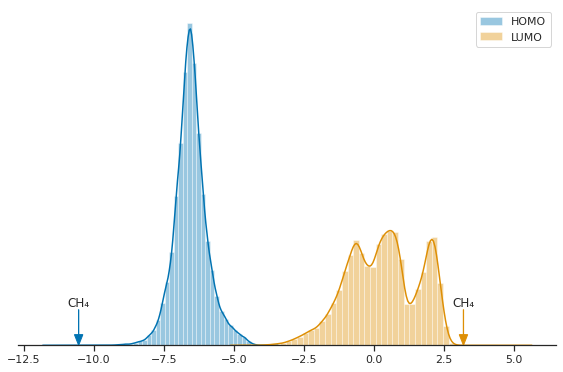

In [4]:
plot()